[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/tmp/ipykernel_63/2122982171.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven_text_data['prompt_name'] = seven_text_data['prompt_name'].str.replace('"', '')
/tmp/ipykernel_63/2122982171.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seven_text_data['text'] = seven_text_data['text'].apply(clean_text)


Précision : 0.9880
Rapport de classification :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      2818
           1       1.00      0.96      0.98      1272

    accuracy                           0.99      4090
   macro avg       0.99      0.98      0.99      4090
weighted avg       0.99      0.99      0.99      4090



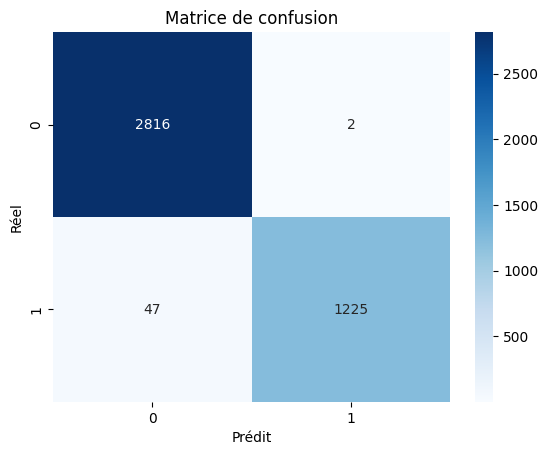

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import unicodedata
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
nltk.download('punkt_tab')

def clean_text(text):
    text = unicodedata.normalize("NFKD", text)
    text = re.sub(r"[^\w\s]", "", text)
    text = text.lower()
    return text

# Chargement des données
text_data = pd.read_csv("/datasets/data/train_v2_drcat_02.csv")

# Filtrer les données
seven_text_data = text_data[text_data['RDizzl3_seven'] == True]
seven_text_data['prompt_name'] = seven_text_data['prompt_name'].str.replace('"', '')
seven_text_data['text'] = seven_text_data['text'].apply(clean_text)

# Vectorisation du texte
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(seven_text_data['text'])
y = seven_text_data['label']

# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisation du modèle SGDClassifier
sgd = SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train, y_train)

# Prédictions
y_pred = sgd.predict(X_test)



In [6]:
y_proba = sgd.predict_proba(X_test) 
y_proba

array([[0.97282275, 0.02717725],
       [0.11171206, 0.88828794],
       [0.93086843, 0.06913157],
       ...,
       [0.99468985, 0.00531015],
       [0.99129459, 0.00870541],
       [0.78226481, 0.21773519]])